In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')

In [3]:
df.shape

(23705, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [5]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [7]:
df.sample(5)

,age,ethnicity,gender,img_name,pixels
5367,24,0,1,20170116222814643.jpg.chip.jpg,26 39 74 122 160 184 188 200 207 209 214 220 2...
21293,65,1,0,20170116204818030.jpg.chip.jpg,80 80 85 86 95 89 89 84 70 70 86 89 86 86 88 8...
2032,16,3,1,20170104222158160.jpg.chip.jpg,16 11 11 11 17 30 46 52 62 64 66 67 63 62 72 8...
15703,40,1,1,20170113012648537.jpg.chip.jpg,8 7 5 7 14 15 11 11 8 17 9 8 4 10 15 12 17 23 ...
8290,26,0,1,20170105163250483.jpg.chip.jpg,175 137 133 145 157 131 100 96 170 223 227 225...


In [8]:
df.drop('img_name',axis=1,inplace=True)

In [9]:
df.ethnicity.value_counts()

ethnicity
0    10078
1     4526
3     3975
2     3434
4     1692
Name: count, dtype: int64

In [10]:
df.gender.value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

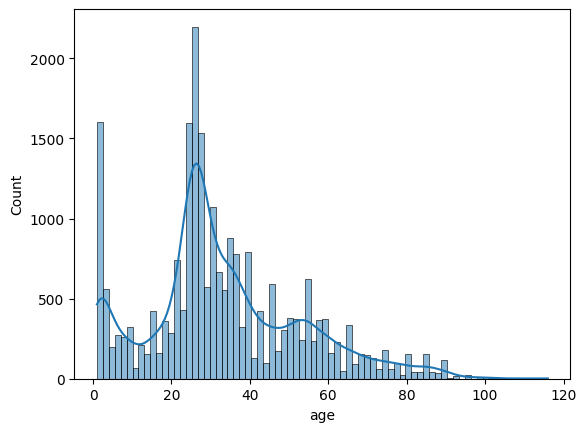

In [11]:
sns.histplot(data=df,x='age',kde=True)

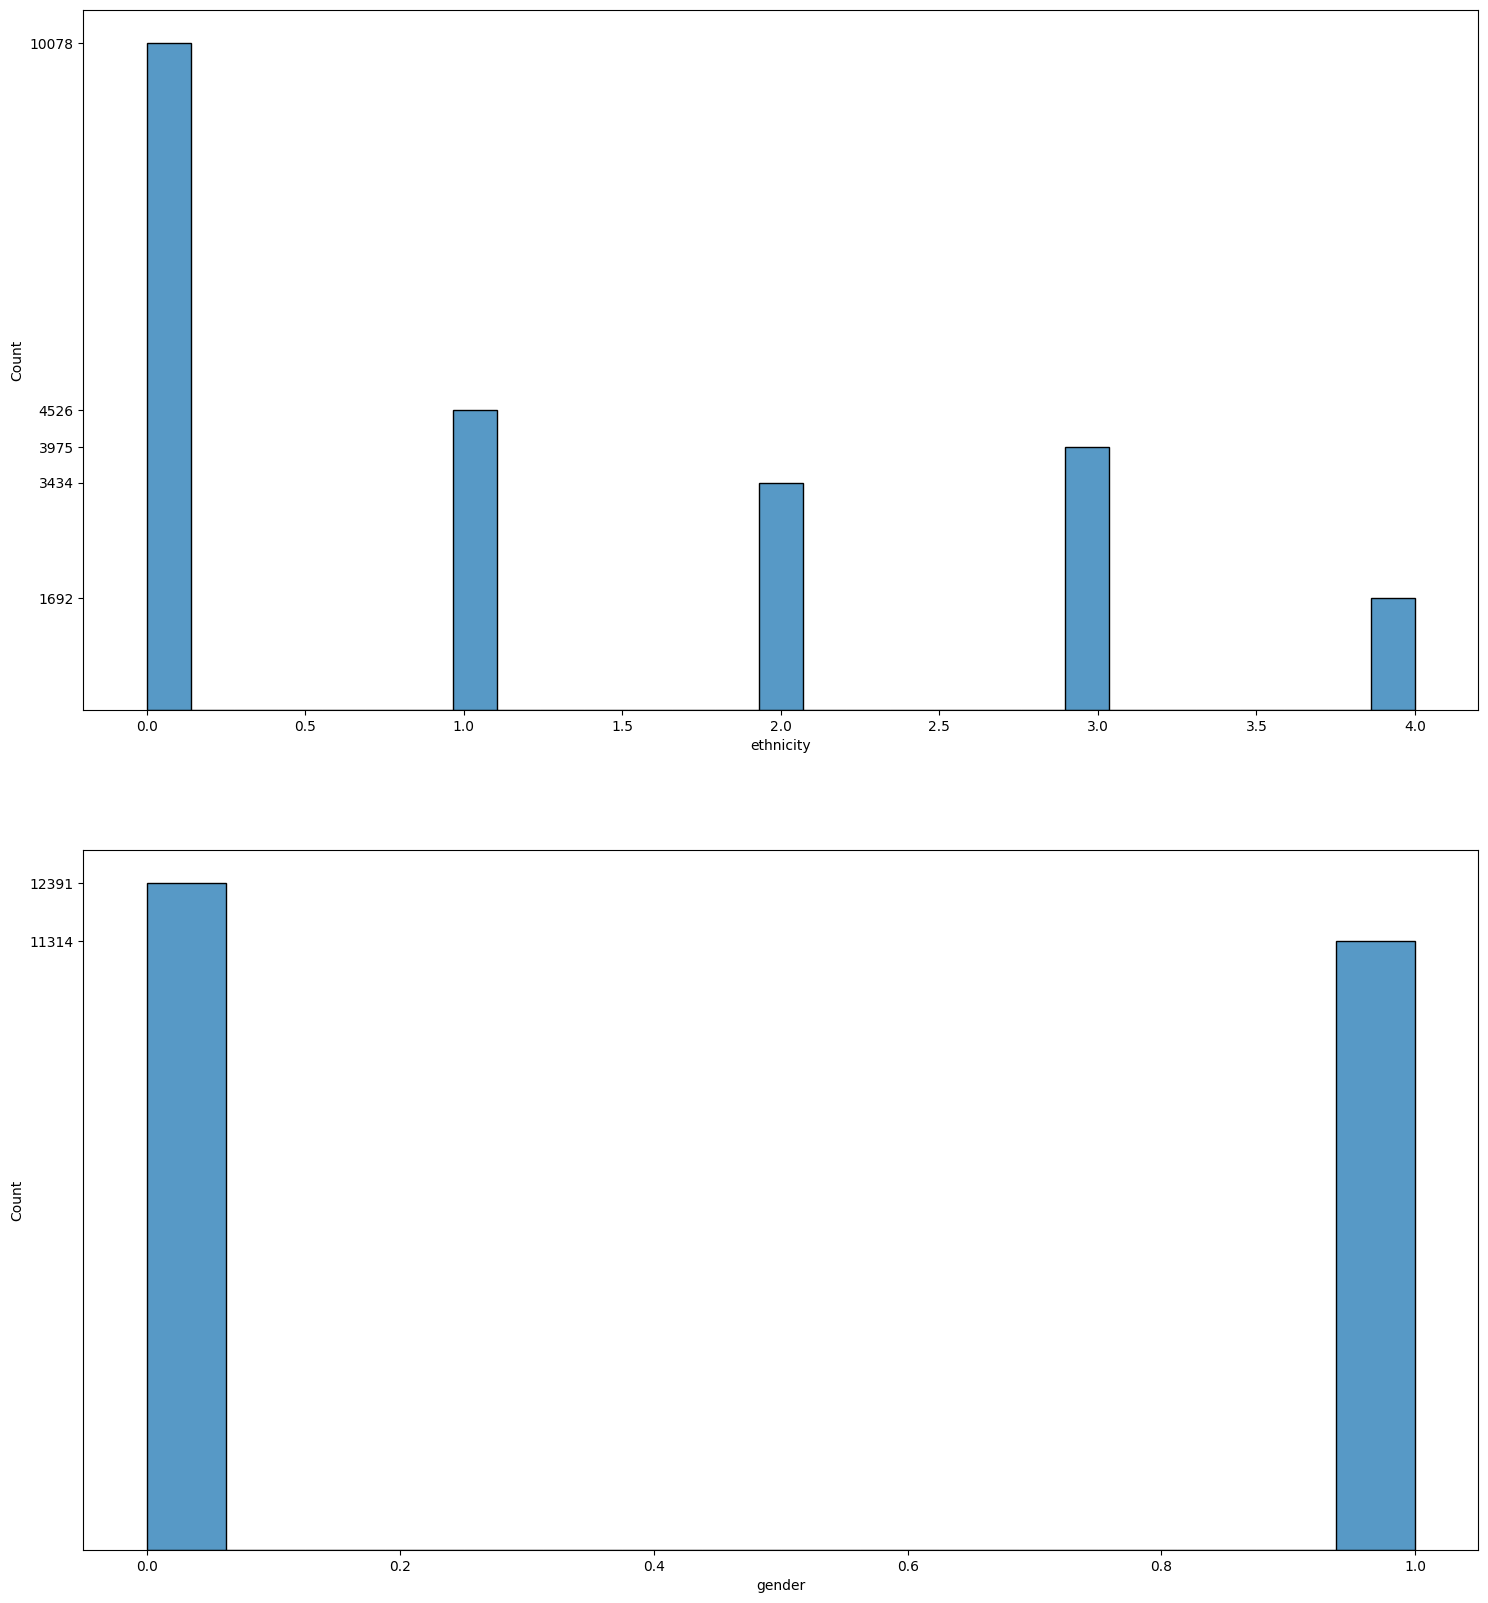

In [12]:
categoricals=['ethnicity','gender']
fig,axes=plt.subplots(2,1,figsize=(18,20))
for i, col in enumerate(categoricals):
    sns.histplot(data=df,x=col,ax=axes[i])
    axes[i].set_yticks(df[col].value_counts())
plt.show()


In [13]:
len(df.pixels[0].split(' '))

2304

In [14]:
np.sqrt(2304)

48.0

In [15]:
NUM_PIXELS=2304
IMG_HEIGHT=48
IMG_WIDTH=48

In [16]:
df['age'] = pd.qcut(df['age'], q=4, labels=[0, 1, 2, 3])

In [17]:
df.age.value_counts()

age
2    6157
0    6044
1    5893
3    5611
Name: count, dtype: int64

In [18]:
y=df[['ethnicity','gender','age']]

In [19]:
y

,ethnicity,gender,age
0,2,0,0
1,2,0,0
2,2,0,0
3,2,0,0
4,2,0,0
...,...,...,...
23700,0,1,3
23701,1,1,3
23702,2,1,3
23703,2,1,3


In [20]:
X=df.drop(columns=['ethnicity','gender','age'],axis=1)

In [21]:
X

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...
...,...
23700,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,45 108 120 156 206 197 140 180 191 199 204 207...


In [22]:
X = pd.Series(X['pixels'])
X = X.apply(lambda x: x.split(' '))
X = X.apply(lambda x: np.array(list(map(lambda z: int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)
X = np.reshape(X, (-1, 48, 48))

X.shape

(23705, 48, 48)

In [23]:
X

array([[[129, 128, 128, ..., 118,  99,  53],
        [130, 129, 128, ..., 117,  98,  52],
        [131, 129, 130, ..., 114,  97,  50],
        ...,
        [121, 138, 147, ..., 151, 150, 148],
        [117, 137, 146, ..., 149, 148, 148],
        [115, 135, 142, ..., 146, 146, 146]],

       [[164,  74, 111, ..., 111, 111, 104],
        [179,  70, 128, ..., 112, 113, 108],
        [176,  71, 146, ..., 112, 112, 109],
        ...,
        [192, 196, 235, ..., 111, 124, 112],
        [230, 226, 233, ..., 198, 197, 180],
        [238, 239, 233, ..., 182, 170, 148]],

       [[ 67,  70,  71, ..., 197, 194, 192],
        [ 65,  66,  69, ..., 197, 194, 192],
        [ 61,  63,  69, ..., 197, 194, 190],
        ...,
        [159, 157, 159, ..., 114, 105, 105],
        [102, 114, 110, ..., 114, 110, 107],
        [ 98,  97,  95, ..., 112, 111, 108]],

       ...,

       [[ 59,  50,  37, ..., 119, 113,  98],
        [ 56,  48,  44, ..., 111, 115,  97],
        [ 40,  32,  26, ..., 108, 117, 101

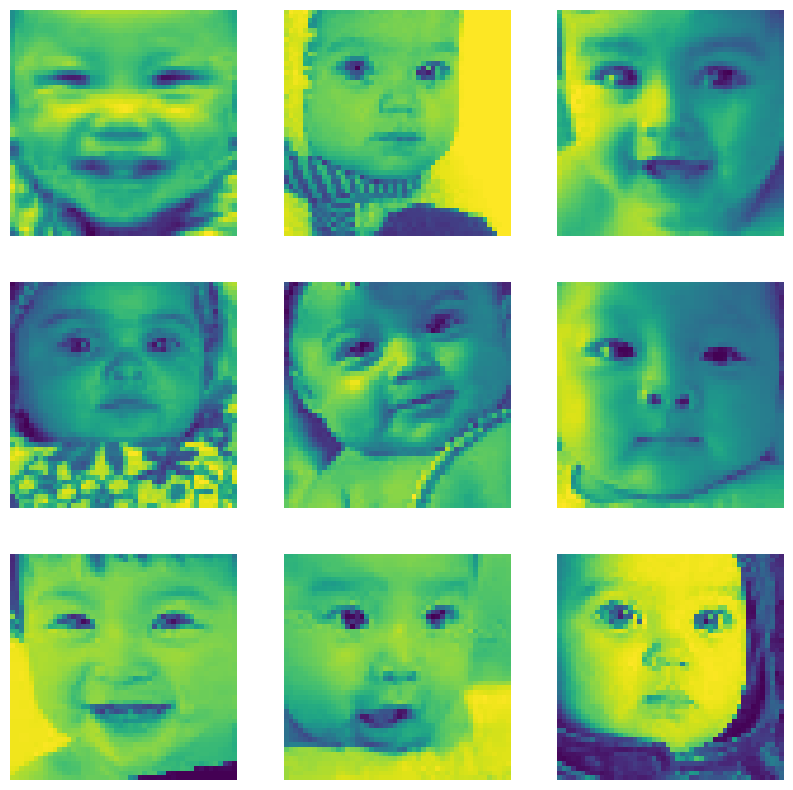

In [24]:
plt.figure(figsize=(10, 10))
for index,image in enumerate(np.random.randint(0, 1000, 9)):
    plt.subplot(3,3,index+1)
    plt.imshow(X[image])
    plt.axis('off')

plt.show()

In [25]:
y_gender =np.array(y['gender'])
y_ethnicity =np.array(y['ethnicity'])
y_age = np.array(y['age'])

In [26]:
y_gender.shape

(23705,)

In [27]:
X.max()

255

In [28]:
X=X/255.0

In [29]:
X.max()

1.0

In [30]:
X.min()

0.0

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Reshape input data (add channel dimension for grayscale)
X = X.reshape(-1, 48, 48, 1)

# One-hot encode the labels
y_gender = to_categorical(y_gender, num_classes=4)

# Create the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps into a vector
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting

# Output layer
model.add(Dense(4, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,660 (3.20 MB)

 Trainable params: 838,660 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_gender,train_size=0.7)

In [33]:
X_train.shape,y_train.shape

((16593, 48, 48, 1), (16593, 4))

In [34]:
X_test.shape,y_test.shape

((7112, 48, 48, 1), (7112, 4))

In [35]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=1)


Epoch 1/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6396 - loss: 0.6543 - val_accuracy: 0.8252 - val_loss: 0.3908
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.8292 - loss: 0.3758 - val_accuracy: 0.8608 - val_loss: 0.3139
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.8550 - loss: 0.3237 - val_accuracy: 0.8698 - val_loss: 0.2955
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.8694 - loss: 0.2929 - val_accuracy: 0.8704 - val_loss: 0.2851
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.8825 - loss: 0.2691 - val_accuracy: 0.8810 - val_loss: 0.2712
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.8953 - loss: 0.2398 - val_accuracy: 0.8768 - val_loss: 0.2839
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9049 - loss: 0.2318 - val_accuracy: 0.8807 - val_loss: 0.2769
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.9034 - loss: 0.2271 - 

In [36]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")


223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8993 - loss: 0.3024
Test Accuracy: 0.8965129256248474
